# Hypothesis Testing
Christopher Hunt

## Instructions

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

- State your Null Hypothesis and Alternative Hypothesis
- Select the correct test according to the data type and number of samples
- Test the assumptions of your selected test.
- Execute the selected test, or the alternative test (if you do not meet the assumptions)
- Interpret your p-value and reject or fail to reject your null hypothesis 
- Show a supporting visualization that helps display the result

## Imports

In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
scipy.__version__

'1.9.3'

In [2]:
## load the kiva_loans.csv. display info and head
df = pd.read_csv('Data/insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
## Drop null values from related columns
df = df.dropna(subset=['charges','smoker'])

# Setting the id as the index
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1. Do smokers have higher insurance charges than non-smokers?

## State the Hypothesis & Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference in insurance charges between smokers and non-smokers. 
- $H_A$ (Alternative Hypothesis):  There is a significant difference in insurance charges between smokers and non-smokers. 

## Determine the correct test to perform

- Numeric Data
- Two groups/samples
- We want to run a 2-sample Test

### Visualize and separate data for hypothesis

- What is our target column?
- What column determines our groups?

In [5]:
## Check the col that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [7]:
# Check the col that contains info on smoker
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [8]:
df['is_smoker'] = df['smoker'].str.contains('yes')
df['is_smoker'].value_counts()

False    1064
True      274
Name: is_smoker, dtype: int64

In [9]:
# save a list of columns needed for each group
needed_cols = ['is_smoker', 'charges']
df[needed_cols]

,is_smoker,charges
0,True,16884.92400
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
...,...,...
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350
1336,False,2007.94500


In [10]:
## save list of columns needed for each group
non_smoker = df.loc[df['is_smoker']==False, needed_cols]
non_smoker

,is_smoker,charges
1,False,1725.55230
2,False,4449.46200
3,False,21984.47061
4,False,3866.85520
5,False,3756.62160
...,...,...
1332,False,11411.68500
1333,False,10600.54830
1334,False,2205.98080
1335,False,1629.83350


In [12]:
## save list of columns needed for each group
smoker = df.loc[df['is_smoker']==True, needed_cols]
smoker

,is_smoker,charges
0,True,16884.92400
11,True,27808.72510
14,True,39611.75770
19,True,36837.46700
23,True,37701.87680
...,...,...
1313,True,36397.57600
1314,True,18765.87545
1321,True,28101.33305
1323,True,43896.37630


In [14]:
# make a df just for visualization by concat the groups
plot_df = pd.concat([smoker, non_smoker])
plot_df

,is_smoker,charges
0,True,16884.9240
11,True,27808.7251
14,True,39611.7577
19,True,36837.4670
23,True,37701.8768
...,...,...
1332,False,11411.6850
1333,False,10600.5483
1334,False,2205.9808
1335,False,1629.8335


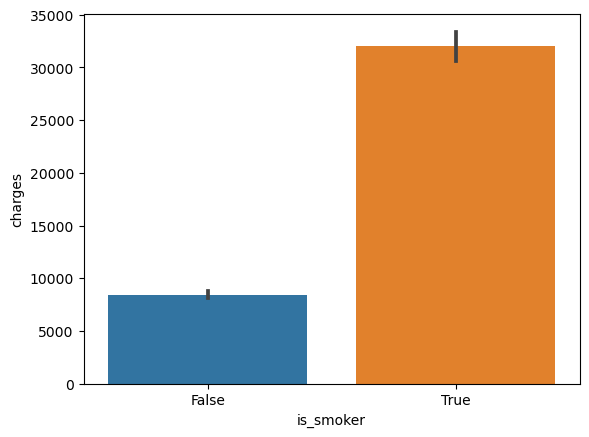

In [16]:
## visualize the group means
sns.barplot(data=plot_df, x='is_smoker',y='charges');

### Testing Assumptions

- No significant outliers
- Normality
- Equal Variance

### Checking Assumption of No Sig. Outliers

In [17]:
# saving JUST the numeric col as final group variables
smoker_group = smoker['charges']
non_smoker_group = non_smoker['charges']
smoker_group

0       16884.92400
11      27808.72510
14      39611.75770
19      36837.46700
23      37701.87680
           ...     
1313    36397.57600
1314    18765.87545
1321    28101.33305
1323    43896.37630
1337    29141.36030
Name: charges, Length: 274, dtype: float64

In [19]:
# Check smoker group for outliers
smoker_outliers = np.abs(stats.zscore(smoker_group)) > 3
smoker_outliers.sum()

0

In [20]:
# Check the non smoker group for outliers
non_smoker_outliers = np.abs(stats.zscore(non_smoker_group)) > 3
non_smoker_outliers.sum()

24

In [21]:
# Remove outliers from non smoker group
non_smoker_group = non_smoker_group.loc[~non_smoker_outliers]
non_smoker_group

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1040, dtype: float64

### Test for Normality

In [22]:
# check smoker group for normality
result = stats.normaltest(smoker_group)
result.pvalue

5.564930630036463e-14

In [23]:
# check n for smoker group
len(smoker_group)

274

In [24]:
# check non-smoker group for normality
result = stats.normaltest(non_smoker_group)
result.pvalue

2.6945416315543976e-36

In [25]:
len(non_smoker_group)

1040

- We have large enough groups that we can safely disregard the assumption of normality

### Test for Equal Variances

In [26]:
## Use Levene's test for equal variance
result = stats.levene(smoker_group, non_smoker_group)
print(result)

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)


In [27]:
# use an if-else to help interpret the p-value
if result.pvalue < .05:
    print(f'The groups do NOT have equal variance')
else:
    print(f'The groups DO have equal variance')

The groups do NOT have equal variance


- We met the assumption of normality but did NOT meet the assumption of equal variance
- We will run a Welch's t-test by adding `equal_var=False` to `stats.ttest_in`

## Final Hypothesis Test - Welch's Test

In [28]:
result = stats.ttest_ind(smoker_group, non_smoker_group, equal_var=False)
print(result)
result.pvalue < .05

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)


True

In [29]:
smoker_group.mean()

32050.23183153284

In [30]:
non_smoker_group.mean()

7939.8608446721155

- We had a p-value < .05 for out welch's test. We reject the null hypothesis and support the alternative that smokers have greater charges than those who do not smoke.

# Q2. Are men more likely to smoke than women?

## State the Hypothesis & Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference between men and women smoking.
- $H_A$ (Alternative Hypothesis):  There is a significant difference between men and women smoking.

## Determine the correct test to perform

- Numeric Data
- Two groups/samples
- We want to run a Chi-Square Test

### Visualize and separate data for hypothesis

In [34]:
# Check the column that contains the measurement
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [35]:
# Check the column that contains information on gender
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [36]:
# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['smoker'])
contingency_table

smoker,no,yes
sex,,
female,547,115
male,517,159


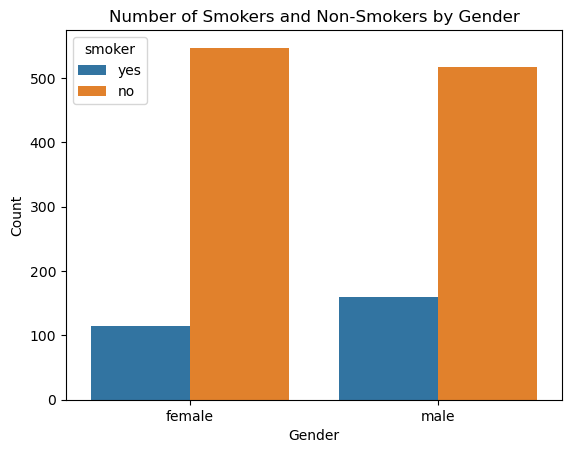

In [61]:
# Create a countplot to visualize the number of smokers and non-smokers by gender
ax = sns.countplot(data=df, x='sex', hue='smoker')
ax.set_title("Number of Smokers and Non-Smokers by Gender")
ax.set_xlabel("Gender")
ax.set_ylabel("Count")
plt.show()

### Testing Assumptions

- Categorical Data
- Expected frequencies for each cell should be at least 5

In [38]:
# Calculate expected frequencies
expected_freq = stats.contingency.expected_freq(contingency_table)

# Display the expected frequencies
expected_freq

array([[526.43348281, 135.56651719],
       [537.56651719, 138.43348281]])

- We have categorical data, and the expected frequencies for each cell are greater than 5.


## Perform the Chi-Square Test


In [44]:
# Run the Test and Save the Output
result = stats.chi2_contingency(contingency_table)
chi2, p, deg_free, expected_vals = result #this labels the results

In [45]:
# What was our p-value?
print(p)
p<.05

0.006548143503580696


True

- The p-value is greater than 0.05 (typically used as the significance level), so we fail to reject the null hypothesis. There is no significant difference between men and women in terms of smoking.


# Q3. Do different regions have different charges, on average?


## State the Hypothesis & Null Hypothesis

- $H_0$ (Null Hypothesis): There is no difference in average charges among different regions.
- $H_A$ (Alternative Hypothesis): There is a significant difference in average charges among different regions.

## Determine the correct test to perform

- Numeric Data
- More than two groups/samples
- We want to run an Analysis of Variance (ANOVA) test

### Visualize and separate data for hypothesis

In [47]:
# Check the column that contains the measurement
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [48]:
# Check the column that contains information on region
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

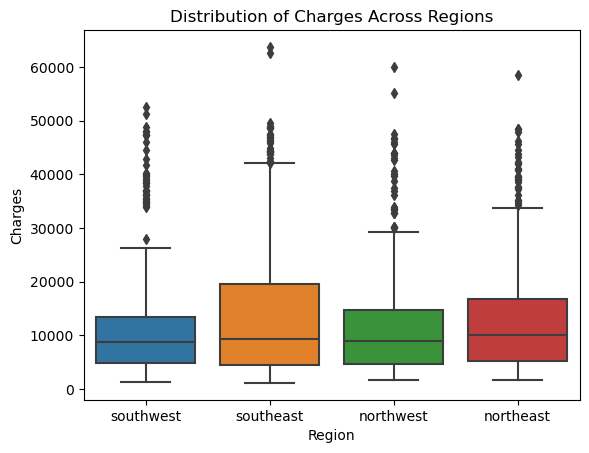

In [62]:
# Create a boxplot for visualization
sns.boxplot(data=df, x='region', y='charges')
plt.title("Distribution of Charges Across Regions")
plt.xlabel("Region")
plt.ylabel("Charges")
plt.show()

### Testing Assumptions

- Numeric Data
- Independence of observations
- Normality
- Homogeneity of variances

## Test for Independence of Observations

- Assuming that the data was collected randomly and independently, this assumption is likely met.


## Test for Normality

In [56]:
# Check the normality assumption for each region
regions = df['region'].unique()

In [57]:
for region in regions:
    region_data = df[df['region'] == region]['charges']
    result = stats.normaltest(region_data)
    print(f"Region: {region}, p-value: {result.pvalue}")

Region: southwest, p-value: 6.125298236442602e-23
Region: southeast, p-value: 4.953296503171451e-15
Region: northwest, p-value: 5.1842093710451725e-24
Region: northeast, p-value: 1.455431391274411e-19


- The p-values for all regions are much smaller than 0.05, indicating that there is no evidence to reject the assumption of normality for any of the regions.

## Perform the Levene's Test

In [58]:
# Use Levene's test for homogeneity of variances
result = stats.levene(*[df[df['region'] == region]['charges'] for region in regions])
print(result)

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)


In [59]:
# Use an if-else to help interpret the p-value
if result.pvalue < 0.05:
    print("The groups do NOT have equal variances.")
else:
    print("The groups DO have equal variances.")

The groups do NOT have equal variances.


- The assumption of homogeneity of variances is not met based on the p-value.

## Perform the ANOVA Test

In [60]:
# Perform the ANOVA test
result = stats.f_oneway(*[df[df['region'] == region]['charges'] for region in regions])
print(result)

F_onewayResult(statistic=2.96962669358912, pvalue=0.0308933560705201)


In [63]:
# Interpret the ANOVA result
if result.pvalue < 0.05:
    print("We reject the null hypothesis. There is a significant difference in average charges among different regions.")
else:
    print("We fail to reject the null hypothesis. There is no significant difference in average charges among different regions.")

We reject the null hypothesis. There is a significant difference in average charges among different regions.
